<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E5%B0%8F%E9%BA%A6%E3%81%A8%E3%83%81%E3%82%A7%E3%82%B9%E7%9B%A4%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

テキストの目的

・数式演算ライブラリのNumPyに慣れる

・グラフの表示に慣れる


どのように学ぶか

累乗に関する逸話の問題をNumPyを用いて解いていきます。

曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話があります。これを題材に多次元配列を扱うための数値計算ライブラリ NumPy の使い方に慣れていきます。


If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?


Wheat and chessboard problem - Wikipedia（最終閲覧日：2019年5月31日）


8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。

まずは4マスの板に小麦の粒を並べていくことを考えます。配列（リスト）の1つの要素を1つのマスに見立てています。


Pythonのリストとfor文を使い次のように作ることができます。

In [1]:
import numpy as np

In [2]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


このリストにnp.array()を使うことで、ndarrayを作成することができます。

In [3]:
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。


サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [8]:
print(small_board_ndarray.shape)
square_size = (2, 2)
b_ndarray = small_board_ndarray.reshape(square_size)
print(b_ndarray)

(4,)
[[1 2]
 [4 8]]


【問題2】n×mマスへの拡張

n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [24]:
def wheat(n_squares):
  board_list = [1]
  for _ in range(n_squares - 1):
    board_list.append(2 * (board_list[-1]))

  board_list = np.array(board_list).reshape(n_squares)

  return board_ndarray

n_squares = (8, 8)
board_ndarray = wheat(n_squares)

print("{}マスのチェス盤の小麦の数は{}".format(n_squares, board_ndarray))

TypeError: ignored

In [39]:
def wheat_chess(square_size):
  # 関数の目的は、n×mマスのチェス盤の小麦の数を記したndarrayを返すこと
  """
  Parameters
  --------
  square_size : tuple of int 
  マスの数 : (default : (8, 8))
  Returns
  --------
  n × mマスのチェス盤の小麦の数
  small_board_ndarray2 : 
  """
  # 前処理
  n_squares = square_size[0] * square_size[1]
  small_board_list2 = [1]
  for _ in range(n_squares - 1):
    small_board_list2.append(2 * small_board_list2[-1])
    
  small_board_ndarray2 = np.array(small_board_list2).reshape(square_size)

  return small_board_ndarray2

square_size = (8, 8)
small_board_ndarray2 = wheat_chess(square_size = square_size)

print("{}マスのチェス盤の小麦の数は{}".format(square_size, small_board_ndarray2))

(8, 8)マスのチェス盤の小麦の数は[[1.0e+00 2.0e+00 4.0e+00 8.0e+00 1.6e+01 3.2e+01 6.4e+01 1.3e+02]
 [2.6e+02 5.1e+02 1.0e+03 2.0e+03 4.1e+03 8.2e+03 1.6e+04 3.3e+04]
 [6.6e+04 1.3e+05 2.6e+05 5.2e+05 1.0e+06 2.1e+06 4.2e+06 8.4e+06]
 [1.7e+07 3.4e+07 6.7e+07 1.3e+08 2.7e+08 5.4e+08 1.1e+09 2.1e+09]
 [4.3e+09 8.6e+09 1.7e+10 3.4e+10 6.9e+10 1.4e+11 2.7e+11 5.5e+11]
 [1.1e+12 2.2e+12 4.4e+12 8.8e+12 1.8e+13 3.5e+13 7.0e+13 1.4e+14]
 [2.8e+14 5.6e+14 1.1e+15 2.3e+15 4.5e+15 9.0e+15 1.8e+16 3.6e+16]
 [7.2e+16 1.4e+17 2.9e+17 5.8e+17 1.2e+18 2.3e+18 4.6e+18 9.2e+18]]


【問題3】小麦の数の合計

8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。


棒グラフはサンプルコードを用意しています。

In [40]:
# 8×8マスのチェス盤の小麦の数の合計
sum_board = small_board_ndarray2.sum()
print("8×8マスのチェス盤の小麦の数合計値は{}".format(sum_board))

8×8マスのチェス盤の小麦の数合計値は1.8446744073709552e+19


In [41]:
# 各列の平均
mean_board_per_columns = small_board_ndarray2.mean(axis = 0)
print("各列の平均は{}".format(mean_board_per_columns))

各列の平均は[9.0e+15 1.8e+16 3.6e+16 7.2e+16 1.4e+17 2.9e+17 5.8e+17 1.2e+18]


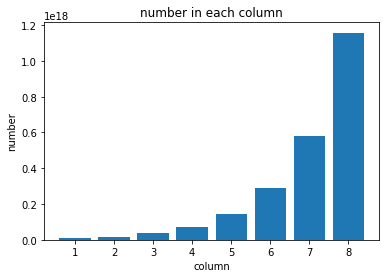

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), mean_board_per_columns)
plt.show()

【問題4】小麦の数のヒートマップ

8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。


ヒートマップはサンプルコードを用意しています。


《ヒートマップのサンプルコード》


4行2列の配列のヒートマップです。値が小さいところが紫、大きいところが黄色になっています。

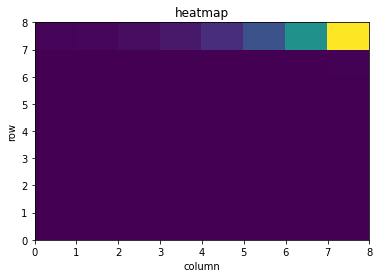

In [43]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(small_board_ndarray2.reshape(square_size))
plt.show()

アメリカの発明家レイ・カーツワイルはこの逸話を引用し、「チェス盤の後半」というフレーズを作りました。技術の進歩ははじめの内は社会に対して目立った影響が感じられなくとも、倍に倍にと進んでいくと、チェス盤の後半にさしかかったころから、急激な変化を起こすということを伝えています。

【問題5】後半は前半の何倍か


チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [44]:
# チェス盤の後半にある小麦の数を算出する
latter_half = small_board_ndarray2[4:, :].sum()
# チェス盤の前半にある小麦の数を算出する
first_half = small_board_ndarray2[:4, :].sum()
# 両者を比較し、後半が前半の何倍かを計算する
how_many_times = latter_half / first_half
print("チェス盤の後半にある小麦の数は前半にある小麦の数の{}倍".format(how_many_times))

チェス盤の後半にある小麦の数は前半にある小麦の数の4294967296.0倍


【問題6】他の計算方法によるn×mマスへの拡張

問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。


それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。



In [50]:
# (np.append())
def wheat_chess_append(square_size):
  # 関数の目的は、n×mマスのチェス盤の小麦の数を記したndarrayを返すこと
  """
  Parameters
  --------
  square_size : tuple of int 
  マスの数 : (default : (8, 8))
  Returns
  --------
  n × mマスのチェス盤の小麦の数
  app_board_ndarray4 : 
  """
  # 前処理
  n_squares = square_size[0] * square_size[1]
  app_board_ndarray = np.array([1])
  times = np.array([2])
  for _ in range(n_squares - 1):
    app_board_ndarray = np.append(app_board_ndarray, times * app_board_ndarray[-1])

  app_board_ndarray = np.array(app_board_ndarray).reshape(square_size)
  return app_board_ndarray

square_size = (8, 8)
app_board_ndarray = wheat_chess_append(square_size = square_size)

print("{}マスのチェス盤の小麦の数は{}".format(square_size, app_board_ndarray))

(8, 8)マスのチェス盤の小麦の数は[[                   1                    2                    4
                     8                   16                   32
                    64                  128]
 [                 256                  512                 1024
                  2048                 4096                 8192
                 16384                32768]
 [               65536               131072               262144
                524288              1048576              2097152
               4194304              8388608]
 [            16777216             33554432             67108864
             134217728            268435456            536870912
            1073741824           2147483648]
 [          4294967296           8589934592          17179869184
           34359738368          68719476736         137438953472
          274877906944         549755813888]
 [       1099511627776        2199023255552        4398046511104
         8796093022208       175921860444

In [51]:
# (ブロードキャスト)
def wheat_chess_broadcast(square_size):
  # 関数の目的は、n×mマスのチェス盤の小麦の数を記したndarrayを返すこと
  """
  Parameters
  --------
  square_size : tuple of int 
  マスの数 : (default : (8, 8))
  Returns
  --------
  n × mマスのチェス盤の小麦の数
  app_board_ndarray4 : 
  """
  # 前処理
  n_squares = square_size[0] * square_size[1]
  indices_of_squares = np.arange(n_squares).astype(np.uint64)
  brocas_board_ndarray = (2 ** indices_of_squares).reshape(square_size)
  return brocas_board_ndarray

square_size = (8, 8)
brocas_board_ndarray = wheat_chess_broadcast(square_size = square_size)

print("{}マスのチェス盤の小麦の数は{}".format(square_size, brocas_board_ndarray))

(8, 8)マスのチェス盤の小麦の数は[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664 

【問題7】計算時間の比較

3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。


%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

In [54]:
# リストを用いた場合のタイム計測
%%timeit 
small_board_ndarray2 = wheat_chess(square_size = square_size)

100000 loops, best of 5: 18.6 µs per loop


In [53]:
# np.appendを用いた場合のタイム計測
%%timeit 
app_board_ndarray = wheat_chess_append(square_size = square_size)

1000 loops, best of 5: 453 µs per loop


In [55]:
# broadcastを用いた場合のタイム計測
%%timeit 
brocas_board_ndarray = wheat_chess_broadcast(square_size = square_size)

The slowest run took 239.65 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.49 µs per loop


∴最も短い時間で実行できたのはbroadcastを用いた場合であった。

なお、次点はリストを用いた場合であるが、最も遅かったnp.appendを用いた場合の実行時間は断トツで時間を要するという結果となった。